In [3]:
%matplotlib inline

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

matplotlib.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)

In [4]:
df = pd.read_csv('length_accuracy.csv')
length = len(df)
df = df[df['correct'] == 1]
df.describe()

,length,correct
count,1436.000000,1436.0
mean,707.306407,1.0
std,389.926816,0.0
min,103.000000,1.0
25%,393.000000,1.0
50%,633.500000,1.0
75%,968.250000,1.0
max,1989.000000,1.0


In [5]:
def to_percent(y, position):
    # Ignore the passed in position. This has the effect of scaling the default
    # tick locations.
    s = str(int(y / len(df) * 100))

    # The percent symbol needs escaping in latex
    if matplotlib.rcParams['text.usetex'] is True:
        return s + r'$\%$'
    else:
        return s + '%'

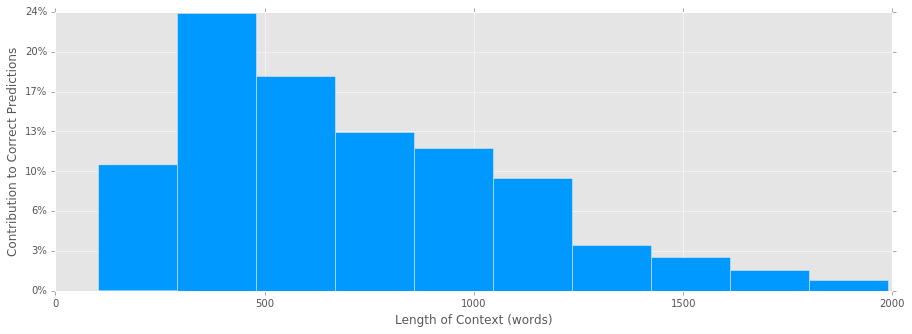

In [13]:
formatter = FuncFormatter(to_percent)
ax = df['length'].plot(kind='hist', bins=10, color="#0099FF")
ax.yaxis.set_major_formatter(formatter)
ax.set_ylabel('Contribution to Correct Predictions')
ax.set_xlabel('Length of Context (words)')